<a href="https://colab.research.google.com/github/Akshita0501/CODSOFT/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/customer_churn.zip'

# Destination directory for extraction
extraction_dir = '/content/'

# Extract the dataset from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the files in the extraction directory to verify the file names
extracted_files = os.listdir(extraction_dir)
print("Extracted files:", extracted_files)


Extracted files: ['.config', 'Churn_Modelling.csv', 'drive', 'sample_data']


In [ ]:
selected_csv_file = 'Churn_Modelling.csv'
csv_file_path = os.path.join(extraction_dir, selected_csv_file)

if os.path.isfile(csv_file_path):
    data = pd.read_csv(csv_file_path)
    print("Data loaded successfully.")
else:
    print(f"File not found: {selected_csv_file}")

Data loaded successfully.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# One-hot encoding for categorical columns
X = pd.get_dummies(data.drop(columns=['Exited']))

# Separate target variable
y = data['Exited']

In [ ]:
# Feature scaling after one-hot encoding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Building and Evaluating the model

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))
print("Classification Report:\n", classification_report(y_test, logistic_pred))

Logistic Regression Results:
Confusion Matrix:
 [[1476  131]
 [ 306   87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1607
           1       0.40      0.22      0.28       393

    accuracy                           0.78      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.74      0.78      0.76      2000



In [ ]:
#Draw Confusion Matrix
confusion_mat = confusion_matrix(y_test, logistic_pred)

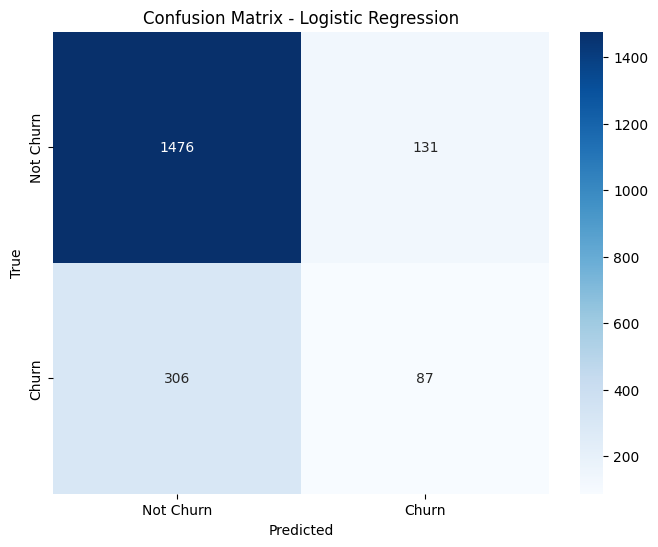

In [ ]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

print("Random Forest Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_pred))
print("Classification Report:\n", classification_report(y_test, forest_pred))


Random Forest Results:
Confusion Matrix:
 [[1577   30]
 [ 262  131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.33      0.47       393

    accuracy                           0.85      2000
   macro avg       0.84      0.66      0.69      2000
weighted avg       0.85      0.85      0.83      2000



In [ ]:
#Draw Confusion Matrix
confusion_mat = confusion_matrix(y_test, forest_pred)

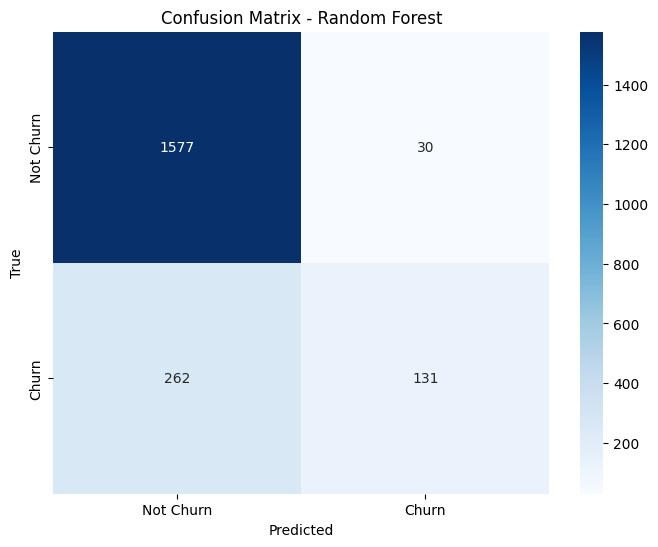

In [ ]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

print("Gradient Boosting Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, gradient_boosting_pred))
print("Classification Report:\n", classification_report(y_test, gradient_boosting_pred))


Gradient Boosting Results:
Confusion Matrix:
 [[1542   65]
 [ 214  179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
#Draw Confusion Matrix
confusion_mat = confusion_matrix(y_test, gradient_boosting_pred)

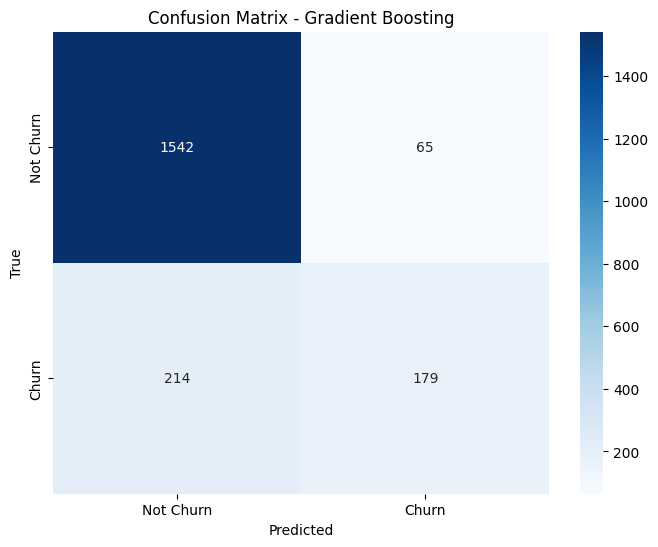

In [ ]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

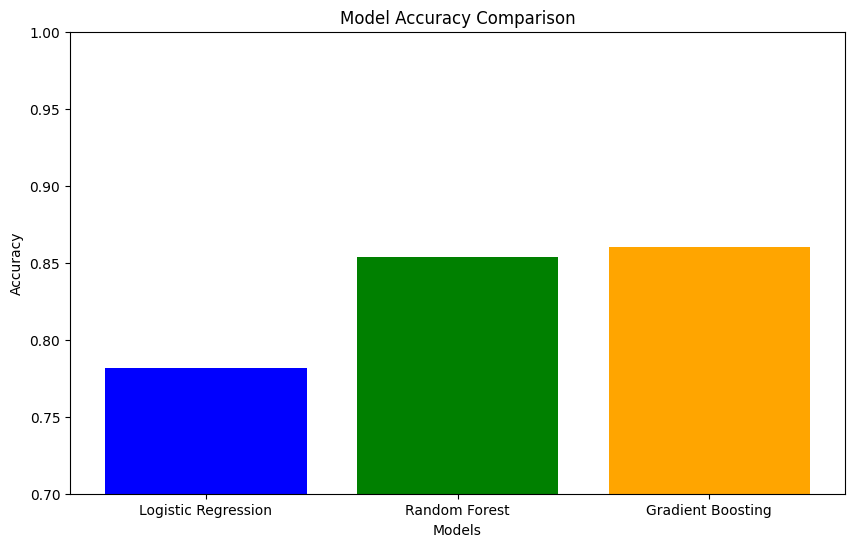

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their accuracy scores
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [logistic_model.score(X_test, y_test), forest_model.score(X_test, y_test), gradient_boosting_model.score(X_test, y_test)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)  # Set the y-axis limits if needed
plt.show()


In [ ]:
def predict_churn_with_probabilities(input_features, scaler, logistic_model, forest_model, gradient_boosting_model):

    input_df = pd.DataFrame([input_features], columns=X.columns)

    input_df.fillna(0, inplace=True)

    # One-hot encoding for categorical columns
    input_encoded = pd.get_dummies(input_df)

    # Feature scaling
    input_scaled = scaler.transform(input_encoded)

    # Use Logistic Regression model for prediction and probabilities
    logistic_prediction = logistic_model.predict(input_scaled)
    logistic_probabilities = logistic_model.predict_proba(input_scaled)[:, 1]

    # Use Random Forest model for prediction and probabilities
    forest_prediction = forest_model.predict(input_scaled)
    forest_probabilities = forest_model.predict_proba(input_scaled)[:, 1]

    # Use Gradient Boosting model for prediction and probabilities
    gradient_boosting_prediction = gradient_boosting_model.predict(input_scaled)
    gradient_boosting_probabilities = gradient_boosting_model.predict_proba(input_scaled)[:, 1]

    return (
        logistic_prediction[0], logistic_probabilities[0],
        forest_prediction[0], forest_probabilities[0],
        gradient_boosting_prediction[0], gradient_boosting_probabilities[0]
    )

# Example usage:
logistic_pred, logistic_prob, forest_pred, forest_prob, gb_pred, gb_prob = predict_churn_with_probabilities(
    input_features, scaler, logistic_model, forest_model, gradient_boosting_model
)

print("Logistic Regression Prediction:", logistic_pred, "Probability:", logistic_prob)
print("Random Forest Prediction:", forest_pred, "Probability:", forest_prob)
print("Gradient Boosting Prediction:", gb_pred, "Probability:", gb_prob)


Logistic Regression Prediction: 0 Probability: 0.0023806435790918673
Random Forest Prediction: 0 Probability: 0.19
Gradient Boosting Prediction: 0 Probability: 0.045601234195970446


In [ ]:
def predict_churn(input_features, scaler, logistic_model, forest_model, gradient_boosting_model):

    input_df = pd.DataFrame([input_features], columns=X.columns)

    input_df.fillna(0, inplace=True)
    input_encoded = pd.get_dummies(input_df)

    # Feature scaling
    input_scaled = scaler.transform(input_encoded)

    # Use Logistic Regression model for prediction
    logistic_prediction = logistic_model.predict(input_scaled)

    # Use Random Forest model for prediction
    forest_prediction = forest_model.predict(input_scaled)

    # Use Gradient Boosting model for prediction
    gradient_boosting_prediction = gradient_boosting_model.predict(input_scaled)

    return logistic_prediction[0], forest_prediction[0], gradient_boosting_prediction[0]

# Example usage:
input_features = {
    'CreditScore': 700,
    'Geography_France': 1,
    'Geography_Germany': 0,
    'Geography_Spain': 0,
    'Gender_Male': 1,
    'Gender_Female': 0,
    'Age': 35,
    'Tenure': 5,
    'Balance': 10000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000
}

logistic_prediction, forest_prediction, gradient_boosting_prediction = predict_churn(
    input_features, scaler, logistic_model, forest_model, gradient_boosting_model
)

print("Logistic Regression Prediction:", logistic_prediction)
print("Random Forest Prediction:", forest_prediction)
print("Gradient Boosting Prediction:", gradient_boosting_prediction)


Logistic Regression Prediction: 0
Random Forest Prediction: 0
Gradient Boosting Prediction: 0
